In [1]:
# Matt Caraher
# Project 6
# 4/17/2022


In [2]:
import pandas as pd
import numpy as np 

# For displaying tree
from matplotlib.pyplot import figure

# For confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For side-by-side model comparisons
import matplotlib
import matplotlib.pyplot as plt


In [3]:
# Read in adult_training.csv
adultDF= pd.read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%206/adult_training.csv")


In [4]:
adultDF.head()


,age,workclass,education,maritalStatus,occupation,sex,capitalGain,capitalLoss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


In [18]:
# Function 1: Make decision tree model function
def makeDTModel(thisCriterion, xTrain, yTrain, maxDepth, maxLeafNodes):
  classifier = DecisionTreeClassifier(criterion = thisCriterion, 
                                         max_leaf_nodes=maxLeafNodes,
                                         max_depth=maxDepth,
                                         random_state = 120).fit(xTrain, yTrain)
  
  return classifier


In [7]:
# Function 2: Display tree and text version of the tree
def displayTree(DTModel, X):
  # Set figure size
  figure(figsize=(10, 8), dpi=80)

  # Plot the tree
  cn = ['low_income', 'hi_income']
  tree.plot_tree(DTModel, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)
  
  # Print text version of the tree
  text_representation = tree.export_text(cart_classifier, 
                                        feature_names=X.columns.values.tolist())
  print(text_representation)


In [8]:
# Function 3: Display text and heatmap of a confusion matrix
def displayCM(classifier, xTrain, yTrain, xTest, yTest):
  predictions = classifier.predict(xTest)

  # Create confusion matrix with parameters
  cm = confusion_matrix(y_true=yTest, 
                           y_pred = predictions)
  
  print(cm)

  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True, 
              linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')


In [16]:
# Function 4: Create and display plots of side-by-side model comparisons
def compareModels(classifier1, classifier2, label1, label2):
  labels = [label1, label2]
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='green')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='yellow')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()


In [11]:
# Create predictor
adultDF['capitalGainsLosses'] = adultDF['capitalGain'] + abs(adultDF['capitalLoss'])

# Create new dataframe for classification (two predictors and a target)
new_adultDF = adultDF.filter(['maritalStatus','capitalGainsLosses','income'], axis=1)

# Encode categoric columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)

from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['maritalStatus','capitalGainsLosses'], axis=1)
y = encoded_adultDF['income']

# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


|--- capitalGainsLosses <= 5095.50
|   |--- maritalStatus <= 2.50
|   |   |--- maritalStatus <= 0.50
|   |   |   |--- class: 0
|   |   |--- maritalStatus >  0.50
|   |   |   |--- capitalGainsLosses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capitalGainsLosses >  1811.00
|   |   |   |   |--- class: 1
|   |--- maritalStatus >  2.50
|   |   |--- class: 0
|--- capitalGainsLosses >  5095.50
|   |--- class: 1

[[2187   62]
 [ 511  200]]


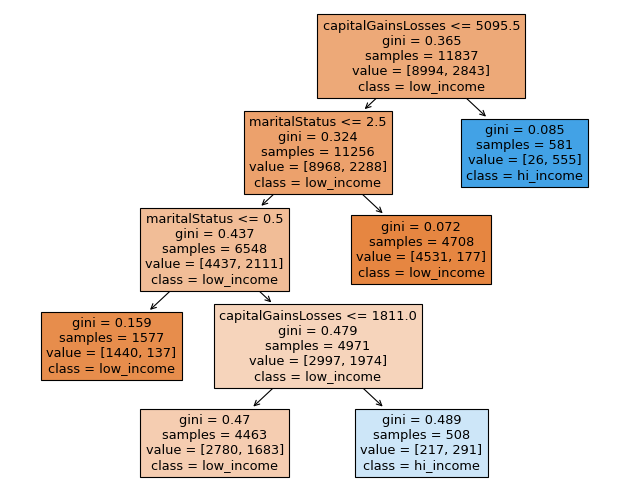

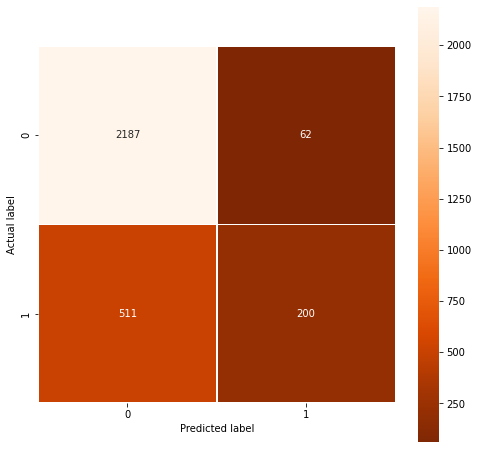

In [19]:
# CART classifier using makeDTModel
cart_classifier = makeDTModel("gini", X_train, y_train, 5, 5) 
displayTree(cart_classifier, X)
displayCM(cart_classifier, X_train, y_train, X_test, y_test)


|--- capitalGainsLosses <= 5095.50
|   |--- maritalStatus <= 2.50
|   |   |--- maritalStatus <= 0.50
|   |   |   |--- class: 0
|   |   |--- maritalStatus >  0.50
|   |   |   |--- capitalGainsLosses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capitalGainsLosses >  1811.00
|   |   |   |   |--- class: 1
|   |--- maritalStatus >  2.50
|   |   |--- class: 0
|--- capitalGainsLosses >  5095.50
|   |--- class: 1

[[2235   14]
 [ 583  128]]


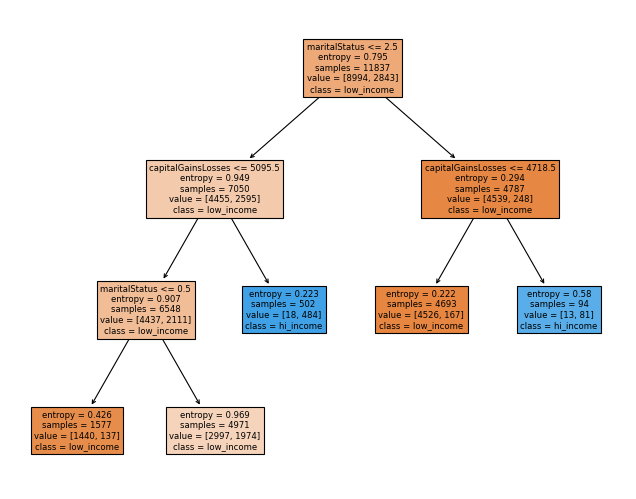

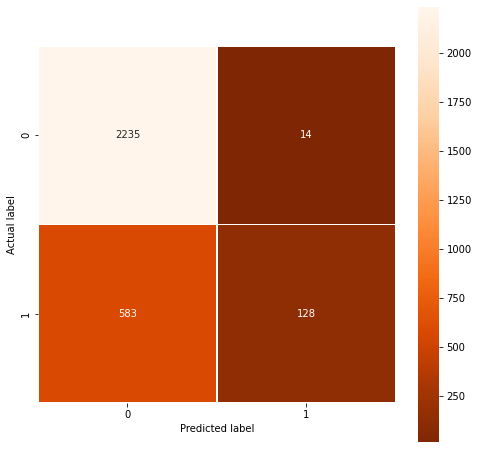

In [13]:
# C5 classifier using makeDTModel
c5_classifier = makeDTModel("entropy", X_train, y_train, 5, 5)
displayTree(c5_classifier, X)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)


In [14]:
# cart_classifier's accuracy on training and test datasets
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))

# c5_classifier's accuracy on training and test datasets
score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))


CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.80, 0.80


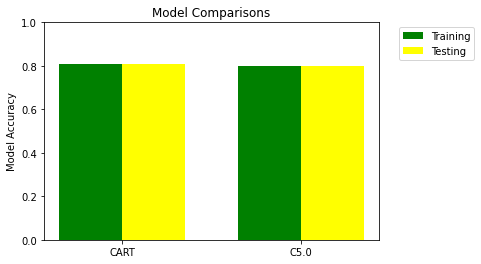

In [17]:
# Compare the CART and C5.0 models
compareModels(cart_classifier, c5_classifier, 'CART', 'C5.0')


Test 1 (maxDepth=2 and maxLeafNodes=3) Training and Testing scores: 0.80, 0.80
Test 2 (maxDepth=5 and maxLeafNodes=None) Training and Testing scores: 0.83, 0.81
Test 3 (maxDepth=5 and maxLeafNodes=2) Training and Testing scores: 0.76, 0.76
Test 4 (maxDepth=None and maxLeafNodes=2) Training and Testing scores: 0.76, 0.76
Test 5 (maxDepth=5 and maxLeafNodes=5) Training and Testing scores: 0.80, 0.80
--------------


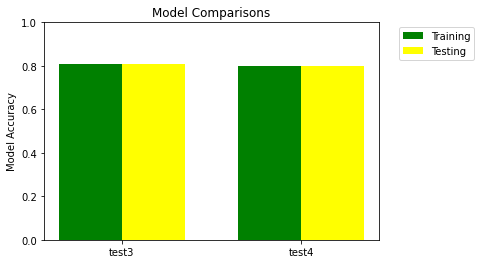

--------------


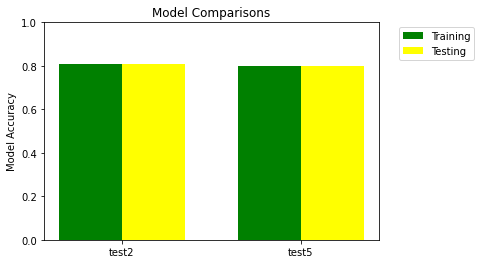

In [71]:
# Analyzing effect of maxDepth and maxLeafNodes on classification accuracy

# Test 1: maxDepth=2 and maxLeafNodes=3
test1_classifier = makeDTModel("entropy", X_train, y_train, 2, 3)
testScore1 = round(test1_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(test1_classifier.score(X_test, y_test), 2)   # testing score

print("Test 1 (maxDepth=2 and maxLeafNodes=3) Training and Testing scores: %.2f, %.2f" %  (testScore1, testScore2))

# Test 2: maxDepth=5 and maxLeafNodes=None
test2_classifier = makeDTModel("entropy", X_train, y_train, 5, None)
testScore3 = round(test2_classifier.score(X_train, y_train), 2) # training score
testScore4 = round(test2_classifier.score(X_test, y_test), 2)   # testing score

print("Test 2 (maxDepth=5 and maxLeafNodes=None) Training and Testing scores: %.2f, %.2f" %  (testScore3, testScore4))

# Test 3: maxDepth=5 and maxLeafNodes=2
test3_classifier = makeDTModel("entropy", X_train, y_train, 5, 2)
testScore5 = round(test3_classifier.score(X_train, y_train), 2) # training score
testScore6 = round(test3_classifier.score(X_test, y_test), 2)   # testing score

print("Test 3 (maxDepth=5 and maxLeafNodes=2) Training and Testing scores: %.2f, %.2f" %  (testScore5, testScore6))

# Test 4: maxDepth=None and maxLeafNodes=2
test4_classifier = makeDTModel("entropy", X_train, y_train, None, 2)
testScore7 = round(test4_classifier.score(X_train, y_train), 2) # training score
testScore8 = round(test4_classifier.score(X_test, y_test), 2)   # testing score

print("Test 4 (maxDepth=None and maxLeafNodes=2) Training and Testing scores: %.2f, %.2f" %  (testScore7, testScore8))

# Test 5: maxDepth=5 and maxLeafNodes=5 
test5_classifier = makeDTModel("entropy", X_train, y_train, 5, 5)
testScore9 = round(test5_classifier.score(X_train, y_train), 2) # training score
testScore10 = round(test5_classifier.score(X_test, y_test), 2)   # testing score

print("Test 5 (maxDepth=5 and maxLeafNodes=5) Training and Testing scores: %.2f, %.2f" %  (testScore9, testScore10))
print("--------------")

# Plot of test 3 and 4 compared (change in max depth)
compareModels(test3_classifier, test4_classifier, 'test3', 'test4')
print("--------------")

# Plot of test 2 and test 5 compared (change in max leaf nodes)
compareModels(test2_classifier, test5_classifier, 'test2', 'test5')


In [ ]:
# Summary of findings for P1:
#
# I found that removing a maximum from the leaf nodes allowe dfor the greatest increase in both training and testing scores.
# This can be seen in test 2 where the training is 0.83 and testing is 0.81 accuracy. I did not find that maxDepth had as much
# of an effect on scores, with maxDepth equalling 5 and None returning the same scores. In the comparison between test 2 and
# test 5, the difference in max leaf nodes is apparent. With training going from 0.83 to 0.80 and testing going from
# 0.81 to 0.80.
